### K-Means Clustering with Scikit Learn

#### Load the dataset

In [1]:
#Import the pandas library
#assign a dataframe variable df and use the pandas read_csv function to import the csv file
#print the information of the df variable using the info function to review what is in the dataframe
#create the feature matrix by assigning the variable X with the values from the df variable
##Annual Income and Spending Score columns
#print X to confirm the correct information was added
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/customers.csv')
print(df.info())
X = df.iloc[:, 1:].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB
None


#### Utilize the K-Means function evaluate the distortion associated for Cluster sizes 1 to 10

In [2]:
#from the scikit learn submodule cluster import the KMeans function
#from Matplotlib library import pyplot
#from the scikit learn library preprocessing submodule import StandardScaler function
#from the scikit learn pipeline submodule import the make_pipeline function
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#create the variable distortions and assign with an empty list
distortions = []

#create a for loop to iterate over the range 1 to 10
#create the km variable and call the make_pipeline function
#pass in the StandardScaler and KMeans functions
#For K-means pass in the parameters:
##n_clusters assign with the 'i' value from the range 1 to 10
##init assign with the k-means++ method for initialization
##n_init assign with the value '10' for the number of times KMeans will be run with different centroids
##max_iter assign with the value '300' for the number of iterations in each single run
##random_state assign with the value '0' to ensure our results are the same each iteration
#call the fit function on the km variable and pass in the feature matrix X
#call the append function on the distortions variable and append the value from the inertia function called on km
for i in range(1,11):
    km_pipe = make_pipeline(StandardScaler(), KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0))
    km_pipe.fit(X)
    distortions.append(km_pipe.named_steps['kmeans'].inertia_)

C:\Users\rewar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rewar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rewar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rewar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

#### Create an Elbow Plot to show the distortion value by Cluster size

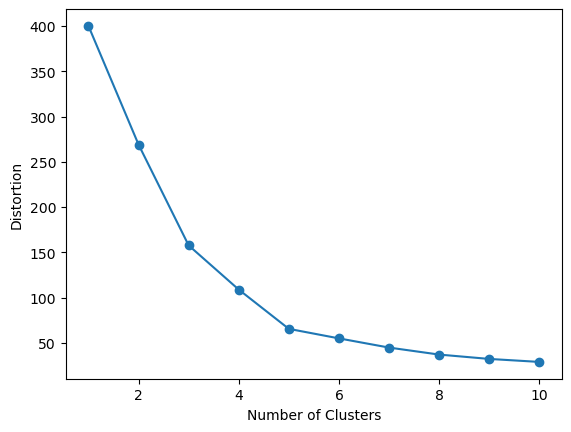

In [3]:
#create the elbow plot
#call the plot function from the matplotlib library and pass in the parameters
##range 1 to 10, the distortions list, marker assign with the value 'o'
#call the xlabel function and pass in the label for the x-axis 'Number of Clusters'
#call the ylabel function and pass in the label for the y-axis 'Distortion'
#call the show function to show the plot
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

#### Create the K-Means Clustering Model with Cluser Size = 5

In [4]:
#Based on the elbow plot above the number of clusters appears optimal at 5
#create the km variable and call the make_pipeline function
#pass in the StandardScaler and KMeans functions
#For KMeans pass in the parameters:
##n_clusters assign with the value '5'
##init assign with the k-means++ method for initialization
##n_init assign with the value '10' for the number of times KMeans will be run with different centroids
##max_iter assign with the value '300' for the number of iterations in each single run
##random_state assign with the value '0' to ensure our results are the same each iteration
#create the y_km variable and call the fit_predict function and pass in the feature matrix X
km_pipe = make_pipeline(StandardScaler(), KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0))
y_km = km_pipe.named_steps['kmeans'].fit_predict(X)#plot the results

C:\Users\rewar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Scatterplot showing K-Means Clusters = 5

C:\Users\rewar\AppData\Local\Temp\ipykernel_23812\2354657656.py:13: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y_km==4,0], X[y_km==4,1], s=50, c='m', marker='x', edgecolor='black', label='cluster 5')


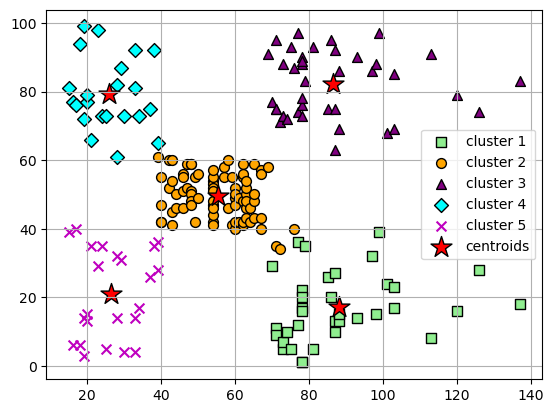

In [6]:
#plot the results
#call the scatter plot function and for each cluster assign the variables with:
##the x and y variables for the values assigned to the specific cluster 1 to 5
##the size of the marker '50'
##the color for the specific cluster - 1=lightgreen, 2=orange, 3=purple, 4=cyan, 5=magenta
##the marker style - 1=sqaure, 2=circle, 3=triangle, 4=diamond, 5=X
##the edgecolor 'black'
##the label of the cluster 1 to 5
plt.scatter(X[y_km==0,0], X[y_km==0,1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km==2,0], X[y_km==2,1], s=50, c='purple', marker='^', edgecolor='black', label='cluster 3')
plt.scatter(X[y_km==3,0], X[y_km==3,1], s=50, c='cyan', marker='D', edgecolor='black', label='cluster 4')
plt.scatter(X[y_km==4,0], X[y_km==4,1], s=50, c='m', marker='x', edgecolor='black', label='cluster 5')

#plot the cluster centroids
#call the scatter plot function and assign the parameters with:
##the x and y variables for the cluster centroids
##the size of the marker '250'
##the marker style '*' for star
##the color 'r' for red
##the edgecolor 'black'
##the label 'centroids'
plt.scatter(km_pipe['kmeans'].cluster_centers_[:,0], km_pipe['kmeans'].cluster_centers_[:,1], s=250, marker='*', 
            c='red', edgecolor='black', label='centroids')

#call the legend function and assign the location with 'best'
#call the grid function
#call the show function
plt.legend(loc='best')
plt.grid()
plt.show()

#### Silhouette Plot showing K-Means Clusters = 5

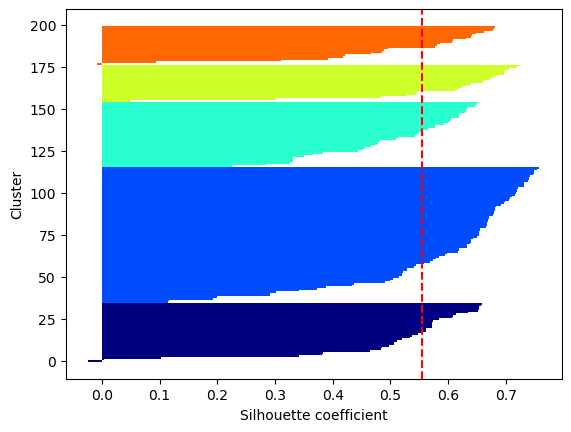

In [7]:
#import the numpy library
#from matplotlib import the cm function
#from the scikit learn metrics submodule import the silhouette_samples function
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

#create the cluster_labels variable and assign by calling the numpy unique function and passing in the y_km variable
#create the n_clusters variable and assign by calling the shape function on the cluster_labels and pass in the index 0
#create the silhouetee_vals (silhouette coefficient) variable
#call the silhouette_samples function and assign the parameters with:
##the feature matrix X, the y_km variable, and metric with the value 'euclidean'
#assign the y_ax_lower and y_ax_upper variables with the value '0'
#create the yticks variables and assign with an empty list
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

#create a for loop and using enumerate call the index and value for each item in the cluster_labels variable
#create the c_silhouette_vals variable and assign with the silhouette_vals[y_km==c] value
#sort the c_silhouette_vals variable using the sort function
#assign the y_ax_upper variable with the length of the c_silhouette_vals variable
#create the color variable and call the cm.jet function and pass in the float value of 'i' divided by the n_clusters
#call the horizontal bar function from the matplotlib library and pass in the parameters:
##x-axis equal to the length of the y_ax_lower and y_ax_upper variables
##y-axis equal to the c_silhouette_vals
##height the value '1.0'
##edgecolor the value 'none'
##color the variable color
##append the yticks list with the value of y_ax_lower plus y_ax_upper divided by 2
#assign the y_ax_lower variable with the length of the c_silhouette_vals variable
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

    
#create the silhouette_avg variable and assign with the mean value of the silhouette_vals variable by calling numpy means
#call the ax vertical line function and pass in the parameters:
##silhouette_avg, color assign the value 'red', linestyle the value '--' to create a dashed line
#call the ylabel function and assign the value 'Cluster'
#call the xlabel function and assign the value 'Silhouette Coefficient'
#call the show function
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()